In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Problem Statement
A bank had collected data about historical loan default along with respective information for each member. 
You need to build a model that will help this bank by predicting the probability that a member will default.
Some pointers:
1.	Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2.	Highlight any trend in data, deep insight, novel steps that you take
3.	Highlight next steps, improvements
4.	Project should take 4-6 hours approx
5.	Submit the Python notebook with code, comments, graphs 
Data Information
We are providing train data set. This data set comprises of information captured in December 2016. Following is the description of variables given


# Step1: Data Understanding and Exploration¶

In [27]:
loan_default_df=pd.read_csv("train_data_1.csv")

In [28]:
loan_default_df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [29]:
# Understand the features data types

loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    270000 non-null  int64  
 1   loan_amnt                    270000 non-null  int64  
 2   funded_amnt                  270000 non-null  int64  
 3   funded_amnt_inv              270000 non-null  float64
 4   term                         270000 non-null  object 
 5   batch_enrolled               173125 non-null  object 
 6   int_rate                     270000 non-null  float64
 7   grade                        270000 non-null  object 
 8   sub_grade                    270000 non-null  object 
 9   emp_title                    254375 non-null  object 
 10  emp_length                   256370 non-null  object 
 11  home_ownership               270000 non-null  object 
 12  annual_inc                   269998 non-null  float64
 13 

In [30]:
# seperating numerical data types
loan_default_df_numeric=loan_default_df.select_dtypes(include=["int64","float64"])

In [31]:
loan_default_df_numeric.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,19.19,28700.0,33.88,0.0,1.0,50.0,...,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,10.99,65000.0,3.64,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,7.26,45000.0,18.42,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0,34900.0,0


In [32]:
# spearating categorical variables

loan_default_df_category=loan_default_df.select_dtypes(include=["object"])

In [33]:
loan_default_df_category.head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
0,36 months,NaN,E,E3,clerk,9 years,OWN,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,NaN,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,NaN,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,NaN,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,NaN,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,NaN,credit_card,refi,900xx,CA,w,INDIVIDUAL,NaN,96th week


# EDA 
 
Check for the missing values (isNA/Null in Data)

In [34]:
loan_default_df.isnull().sum() #null values found for the coulumns

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  96875
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       15625
emp_length                      13630
home_ownership                      0
annual_inc                          2
verification_status                 0
pymnt_plan                          0
desc                           231621
purpose                             0
title                              43
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         6
inq_last_6mths                      6
mths_since_last_delinq         138502
mths_since_last_record         228711
open_acc                            6
pub_rec     

In [35]:
loan_default_df.isna().sum() # null values found for the coulumns

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  96875
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       15625
emp_length                      13630
home_ownership                      0
annual_inc                          2
verification_status                 0
pymnt_plan                          0
desc                           231621
purpose                             0
title                              43
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         6
inq_last_6mths                      6
mths_since_last_delinq         138502
mths_since_last_record         228711
open_acc                            6
pub_rec     

In [36]:
loan_default_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,2.700000e+05,270000.000000,270000.000000,270000.000000,270000.000000,2.699980e+05,270000.000000,269994.000000,269994.000000,131498.000000,...,270000.000000,270000.000000,270000.000000,269958.000000,67505.000000,269994.000000,248617.000000,2.486170e+05,2.486170e+05,270000.000000
mean,3.500089e+07,14749.904167,14736.266296,14696.206530,13.243335,7.506215e+04,18.128041,0.315822,0.694182,34.003749,...,0.402963,45.419585,4.805591,0.014261,44.058633,0.004930,213.969358,1.395263e+05,3.207576e+04,0.236378
std,2.413323e+07,8427.573821,8421.906894,8434.618225,4.379194,6.485241e+04,8.307225,0.868445,0.994583,21.851861,...,4.220959,397.525840,60.381161,0.133470,22.172078,0.076895,2029.834018,1.531235e+05,3.762495e+04,0.424858
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.085953e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.981800e+04,1.400000e+04,0.000000
50%,3.709728e+07,13000.000000,13000.000000,13000.000000,12.990000,6.485750e+04,17.630000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.033500e+04,2.380000e+04,0.000000
75%,5.851962e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.085710e+05,3.990000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,137.400000,30.000000,28.000000,176.000000,...,358.680000,29623.350000,7002.190000,16.000000,176.000000,5.000000,496651.000000,3.840795e+06,9.999999e+06,1.000000


In [46]:
##Missin value treatment

loan_default_df_final=loan_default_df.fillna(loan_default_df.median())

In [47]:
loan_default_df_final=loan_default_df.fillna(loan_default_df.mode)

In [48]:
loan_default_df_final.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

In [49]:
loan_corr=loan_default_df_final.corr()
loan_corr

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,dti,revol_bal,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,loan_status
member_id,1.000000,0.066965,0.069302,0.074948,-0.138516,0.136457,0.037469,-0.460130,-0.075444,-0.116453,-0.074544,-0.490034
loan_amnt,0.066965,1.000000,0.999243,0.996989,0.144700,0.040707,0.339611,0.532016,0.033987,0.075214,0.056017,-0.095343
funded_amnt,0.069302,0.999243,1.000000,0.997921,0.144882,0.041588,0.339486,0.531083,0.033660,0.074731,0.055759,-0.097306
funded_amnt_inv,0.074948,0.996989,0.997921,1.000000,0.144917,0.043890,0.337646,0.528454,0.030071,0.073382,0.053839,-0.101777
int_rate,-0.138516,0.144700,0.144882,0.144917,1.000000,0.164468,-0.035750,0.444738,0.055641,0.108777,0.073719,0.001469
dti,0.136457,0.040707,0.041588,0.043890,0.164468,1.000000,0.140277,0.017326,-0.011046,0.005935,0.007451,-0.134852
revol_bal,0.037469,0.339611,0.339486,0.337646,-0.035750,0.140277,1.000000,0.140816,0.004394,0.011448,0.009183,-0.042522
total_rec_int,-0.460130,0.532016,0.531083,0.528454,0.444738,0.017326,0.140816,1.000000,0.092444,0.069539,0.056140,0.037635
total_rec_late_fee,-0.075444,0.033987,0.033660,0.030071,0.055641,-0.011046,0.004394,0.092444,1.000000,0.070089,0.056691,-0.003907
recoveries,-0.116453,0.075214,0.074731,0.073382,0.108777,0.005935,0.011448,0.069539,0.070089,1.000000,0.809329,-0.063569


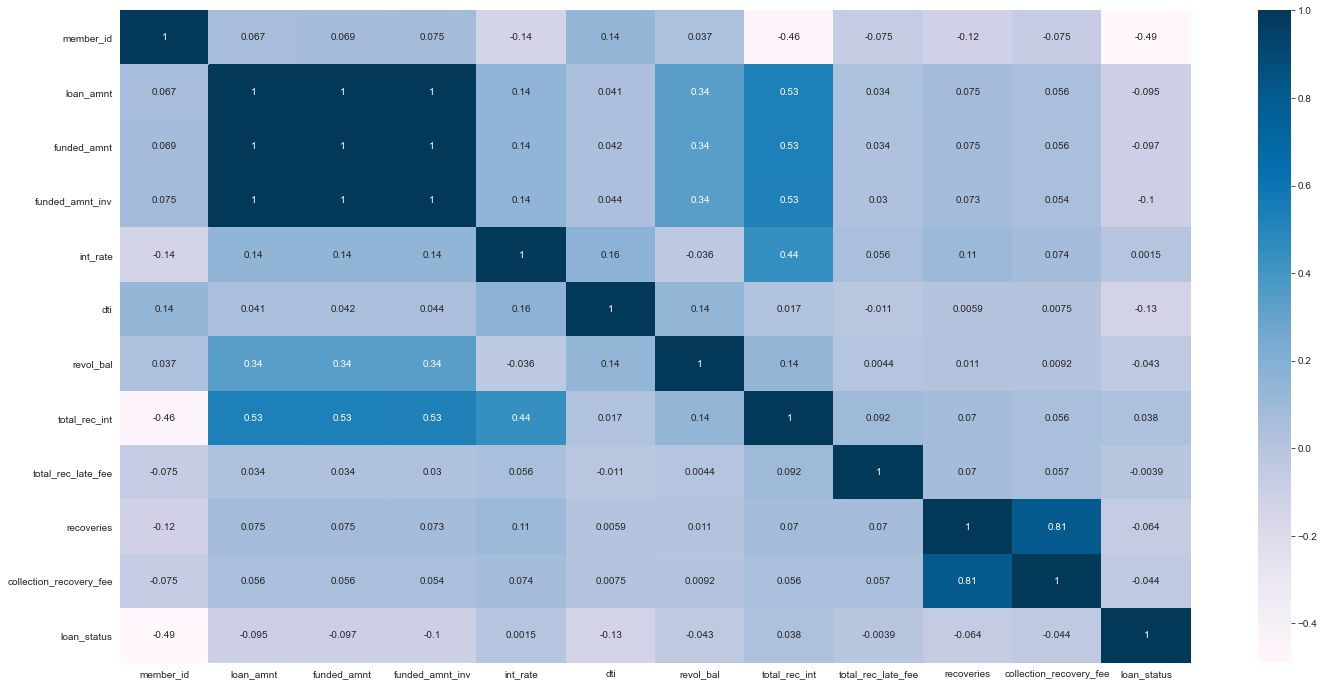

In [50]:
plt.figure(figsize=(24,12))
sns.heatmap(loan_corr,cmap="PuBu",annot=True)
plt.show()

In [51]:
loan_default_df_final.drop("member_id",axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.000000,36 months,<bound method DataFrame.mode of member...,19.19,E,E3,clerk,9 years,...,0,74,INDIVIDUAL,<bound method DataFrame.mode of member...,26th week,0,0,28699,30800,0
1,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,9th week,0,0,9974,32900,0
2,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,9th week,0,65,38295,34900,0
3,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,135th week,0,0,55564,24700,0
4,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,96th week,0,0,47159,47033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,4200,4200,4200.000000,36 months,<bound method DataFrame.mode of member...,13.98,C,C3,Medical Advocate Driver,< 1 year,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,61th week,0,0,80784,7200,0
269996,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,< 1 year,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,69th week,0,0,26082,59200,0
269997,12000,12000,11127.822575,36 months,<bound method DataFrame.mode of member...,7.88,A,A5,Applied Information Sciences Inc.,3 years,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,113th week,0,<bound method DataFrame.mode of member...,<bound method DataFrame.mode of member...,<bound method DataFrame.mode of member...,1
269998,22000,22000,22000.000000,36 months,<bound method DataFrame.mode of member...,12.49,B,B4,AMI Administrator,10+ years,...,0,<bound method DataFrame.mode of member...,INDIVIDUAL,<bound method DataFrame.mode of member...,96th week,0,0,130449,34500,0


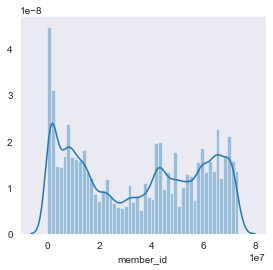

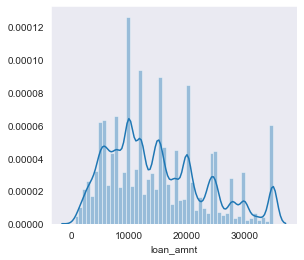

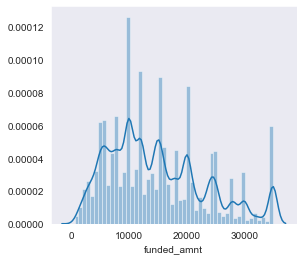

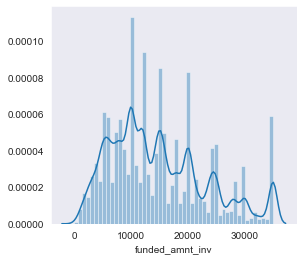

KeyError: 'term'

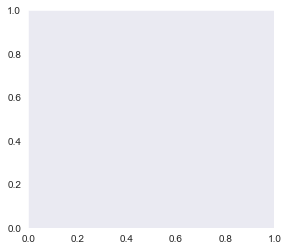

In [52]:
# plotting distribution plot to understand the data distribution
for i in loan_default_df_final.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(loan_default_df_numeric[i])
    plt.show()

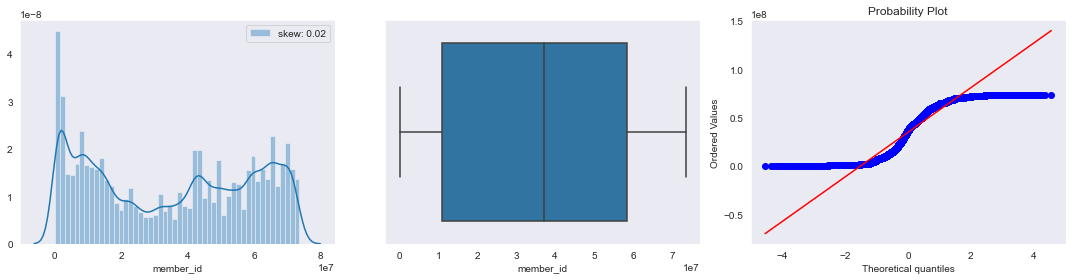

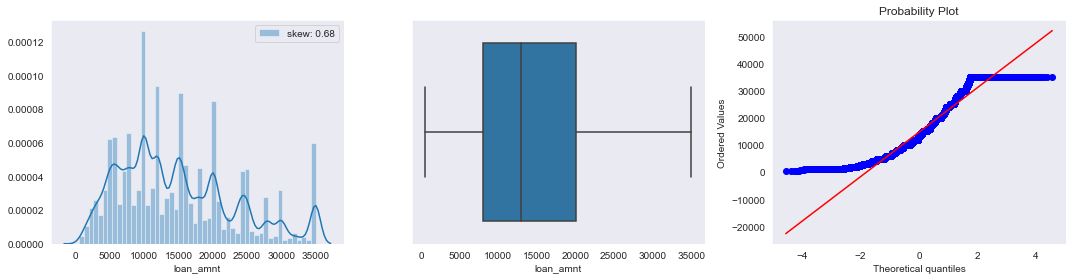

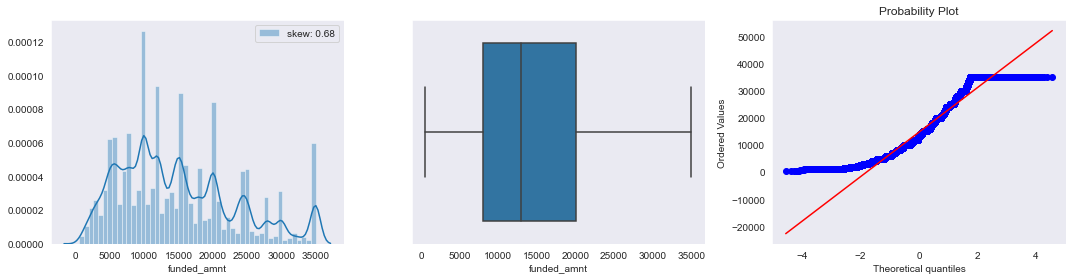

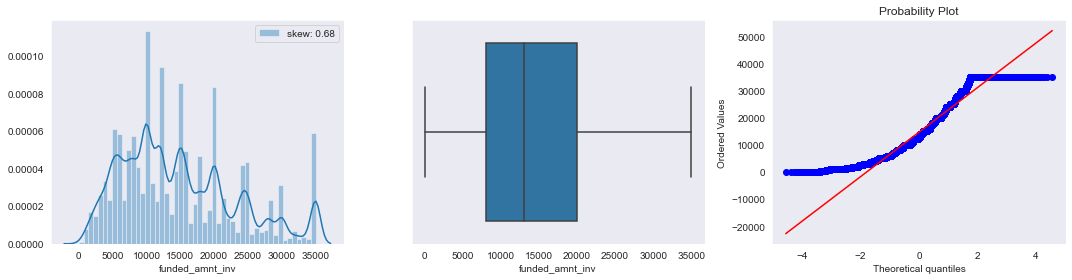

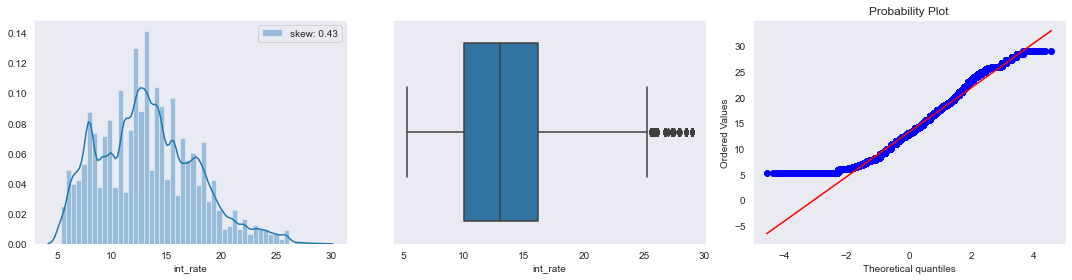

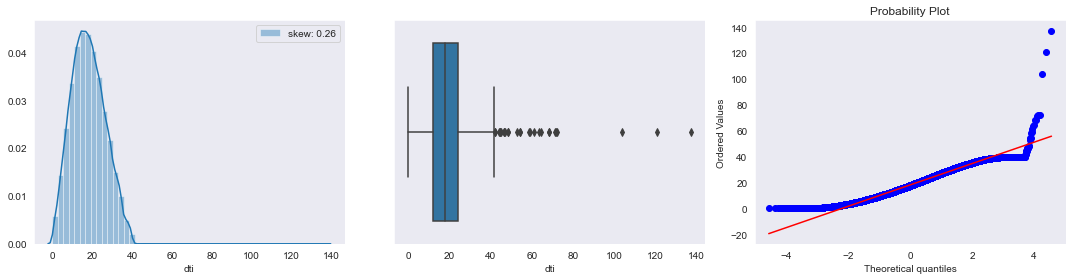

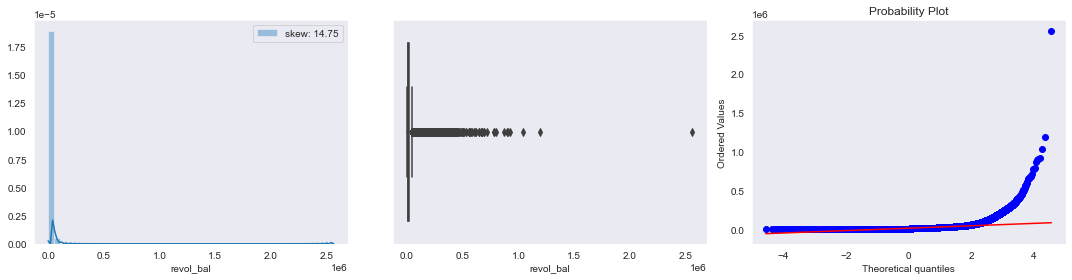

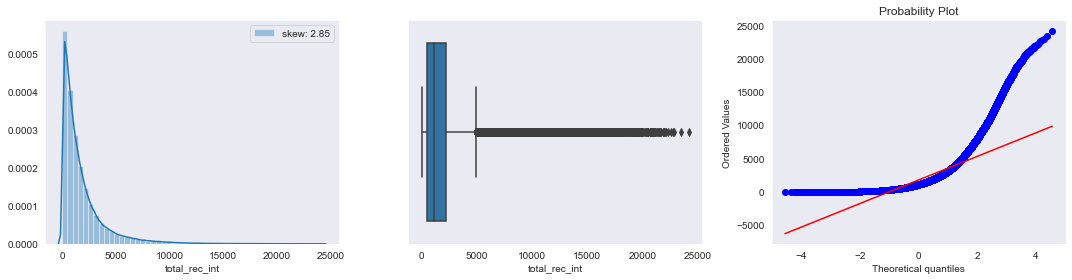

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


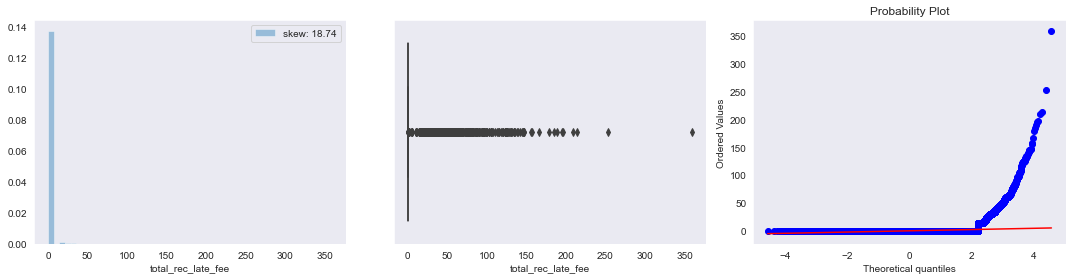

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


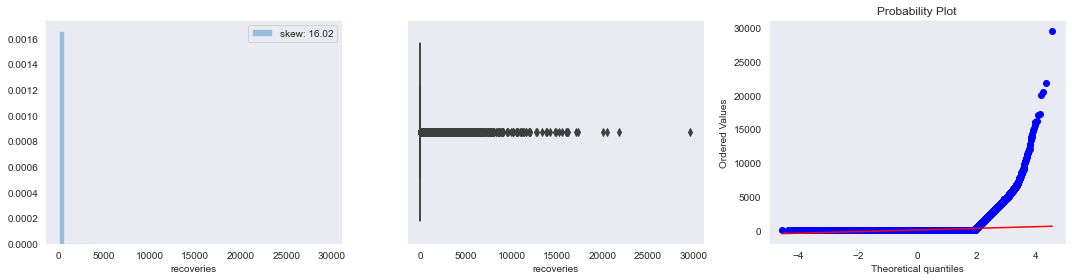

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


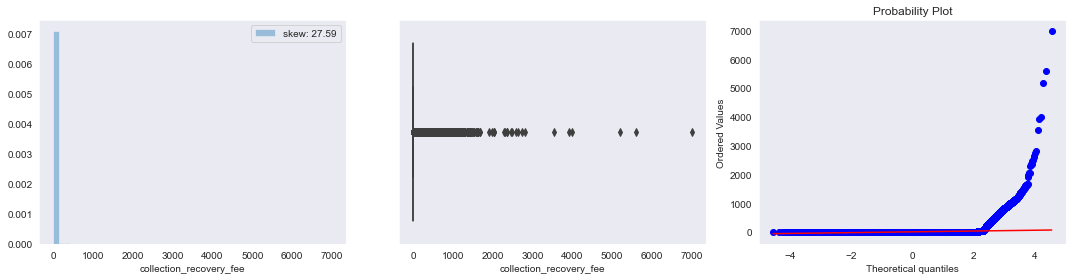

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


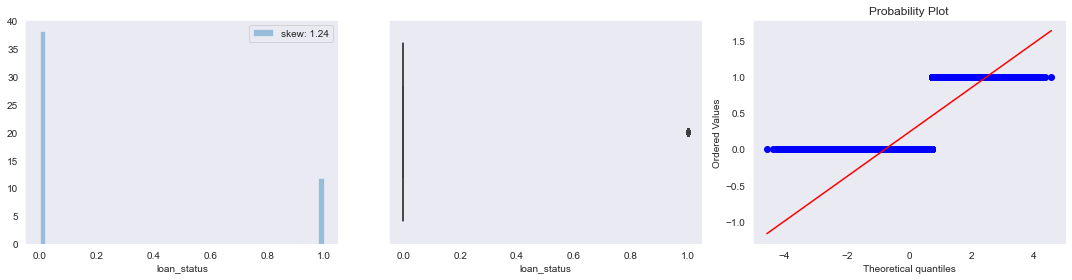

In [53]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df=loan_default_df
sns.set_style('dark')
for col in loan_default_df_final.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [54]:
# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for i in loan_default_df_final.describe().columns:
    print('The skewness for {} is {} and the Max_Z-Score value for {} is {} respectively'.format(i,loan_default_df_final[i].skew(),i,np.max(abs(stats.zscore(loan_default_df_final[i])))))

The skewness for member_id is 0.017745036086062954 and the Max_Z-Score value for member_id is 1.5971351543443615 respectively
The skewness for loan_amnt is 0.6794224797784283 and the Max_Z-Score value for loan_amnt is 2.4028425930319868 respectively
The skewness for funded_amnt is 0.6815821757294267 and the Max_Z-Score value for funded_amnt is 2.406078752100961 respectively
The skewness for funded_amnt_inv is 0.6786729994790835 and the Max_Z-Score value for funded_amnt_inv is 2.4072021433044197 respectively
The skewness for int_rate is 0.43111819335779106 and the Max_Z-Score value for int_rate is 3.5957971236743895 respectively
The skewness for dti is 0.26017842838533534 and the Max_Z-Score value for dti is 14.357644581563328 respectively
The skewness for revol_bal is 14.745967003732467 and the Max_Z-Score value for revol_bal is 115.81170462338491 respectively
The skewness for total_rec_int is 2.852666995032222 and the Max_Z-Score value for total_rec_int is 10.729981952864005 respectiv

In [55]:
#loan_default_df_final["annual_inc"].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

for i in loan_default_df_final.describe().columns:
    print("the percentile for {},is {} respectively".format(i,loan_default_df_final[i].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5, 0.75,0.8,0.9,1.0])))

the percentile for member_id,is 0.01      605707.79
0.02      768235.86
0.03      927949.77
0.04     1088252.20
0.25    10859531.00
0.50    37097277.00
0.75    58519619.00
0.80    61426562.40
0.90    67596985.40
1.00    73544841.00
Name: member_id, dtype: float64 respectively
the percentile for loan_amnt,is 0.01     1800.0
0.02     2400.0
0.03     3000.0
0.04     3075.0
0.25     8000.0
0.50    13000.0
0.75    20000.0
0.80    21600.0
0.90    27775.0
1.00    35000.0
Name: loan_amnt, dtype: float64 respectively
the percentile for funded_amnt,is 0.01     1800.0
0.02     2400.0
0.03     3000.0
0.04     3050.0
0.25     8000.0
0.50    13000.0
0.75    20000.0
0.80    21600.0
0.90    27600.0
1.00    35000.0
Name: funded_amnt, dtype: float64 respectively
the percentile for funded_amnt_inv,is 0.01     1600.0
0.02     2300.0
0.03     2800.0
0.04     3000.0
0.25     8000.0
0.50    13000.0
0.75    20000.0
0.80    21575.0
0.90    27600.0
1.00    35000.0
Name: funded_amnt_inv, dtype: float64 respectiv

# Outlier treatmen IQR and Capping Method

In [56]:
col_sel=['annual_inc', 'delinq_2yrs','inq_last_6mths',
'pub_rec','revol_bal',
'total_rec_int',
'recoveries',
 'collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

def iqr_capping(df, cols, factor):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(loan_default_df_final, col_sel, 1.5)

TypeError: '<' not supported between instances of 'float' and 'method'

In [44]:
# Finding skew after and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for i in loan_default_df_final.describe().columns:
    print('The skewness for {} is {} and the Max_Z-Score value for {} is {} respectively'.format(i,loan_default_df_final[i].skew(),i,np.max(abs(stats.zscore(loan_default_df_final[i])))))

The skewness for member_id is 0.017745036086062954 and the Max_Z-Score value for member_id is 1.5971351543443615 respectively
The skewness for loan_amnt is 0.6794224797784283 and the Max_Z-Score value for loan_amnt is 2.4028425930319868 respectively
The skewness for funded_amnt is 0.6815821757294267 and the Max_Z-Score value for funded_amnt is 2.406078752100961 respectively
The skewness for funded_amnt_inv is 0.6786729994790835 and the Max_Z-Score value for funded_amnt_inv is 2.4072021433044197 respectively
The skewness for int_rate is 0.43111819335779106 and the Max_Z-Score value for int_rate is 3.5957971236743895 respectively
The skewness for annual_inc is 0.8842294756210577 and the Max_Z-Score value for annual_inc is 2.4771714661304 respectively
The skewness for dti is 0.26017842838533534 and the Max_Z-Score value for dti is 14.357644581563328 respectively
The skewness for delinq_2yrs is 0 and the Max_Z-Score value for delinq_2yrs is nan respectively
The skewness for inq_last_6mths 

C:\Users\uvenkata\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd



The skewness for total_rec_int is 1.1075757454463822 and the Max_Z-Score value for total_rec_int is 2.335846748757493 respectively
The skewness for total_rec_late_fee is 18.739246259742274 and the Max_Z-Score value for total_rec_late_fee is 84.88064069848772 respectively
The skewness for recoveries is 0 and the Max_Z-Score value for recoveries is nan respectively
The skewness for collection_recovery_fee is 0 and the Max_Z-Score value for collection_recovery_fee is nan respectively
The skewness for collections_12_mths_ex_med is 0 and the Max_Z-Score value for collections_12_mths_ex_med is nan respectively
The skewness for mths_since_last_major_derog is 0.5473389335552281 and the Max_Z-Score value for mths_since_last_major_derog is 11.905161246136698 respectively
The skewness for acc_now_delinq is 0 and the Max_Z-Score value for acc_now_delinq is nan respectively
The skewness for tot_coll_amt is 0 and the Max_Z-Score value for tot_coll_amt is nan respectively
The skewness for tot_cur_ba

In [57]:
loan_default_df_final.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li